In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
import datetime
from sklearn.metrics import mean_squared_error
from pandas.plotting import autocorrelation_plot

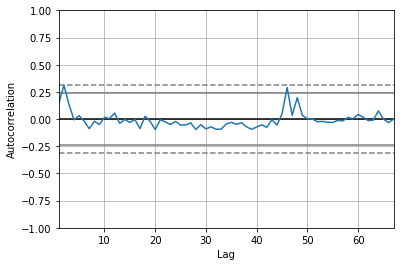

In [3]:
series = pd.read_csv('cluster_1_Arima.csv', usecols=['Tahun','count'],header=0, parse_dates=[0], index_col=0, squeeze=True)
autocorrelation_plot(series)
plt.show()

C:\Users\Ahmad Shohibus S\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Ahmad Shohibus S\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.count   No. Observations:                   66
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -350.818
Method:                       css-mle   S.D. of innovations             48.907
Date:                Thu, 26 Sep 2019   AIC                            715.635
Time:                        21:56:37   BIC                            730.963
Sample:                             1   HQIC                           721.692
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.4941      2.650      0.564      0.575      -3.699       6.687
ar.L1.D.count    -0.7418      0.135     -5.484      0.000      -1.007      -0.477
ar.L2.D.count    -0.1399      0.173     

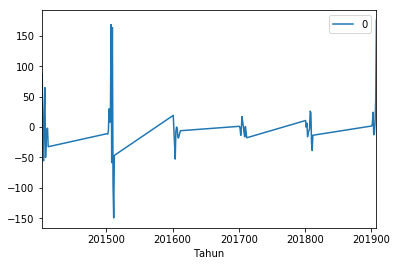

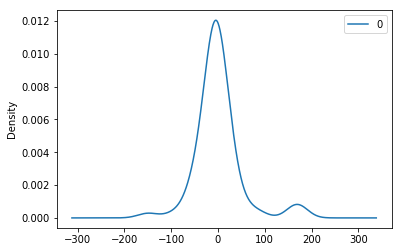

                0
count   66.000000
mean     0.616482
std     49.525405
min   -149.497326
25%    -16.061058
50%     -4.803971
75%      8.154826
max    175.720236


In [6]:
series = pd.read_csv('cluster_1_Arima.csv', usecols=['Tahun','count'],header=0, parse_dates=[0], index_col=0, squeeze=True)
# fit model
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

In [ ]:
series = pd.read_csv('cluster_0_Arima.csv', usecols=['Tahun','count'],header=0, parse_dates=[0], index_col=0, squeeze=True)
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
plt.title("ARIMA Cluster 1")
plt.plot(test)
plt.plot(predictions, color='red')
plt.savefig("plot prediction/plot arima 0.csv")